## Emotion Recognition of Twitter Dataset using Transformers and HuggingFace DistilBERT

### What is Transformers

- Transformers are a type of neural network architecture that relies on the attention mechanism. The attention mechanism allows the model to learn long-range dependencies between different parts of a sequence.

- Transformers are typically composed of two main parts: an encoder and a decoder. The encoder takes the input sequence and produces a sequence of hidden states. The decoder then takes these hidden states and produces the output sequence.

- Transformers are now used for a variety of natural language processing tasks, including machine translation, text summarization, and question answering. They have also been used for other tasks, such as speech recognition and computer vision.


<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/nlp1.1.jpg" width=1000>


<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/nlp1.2.jpg" width=1000>


Machine learning has grown leaps and bounds in the last decade. Though each sub-domain with ML landscape has substantially grown, but NLP particularly has seen the steepest growth and the biggest strategic breakthrough in NLP have been “Transformers” and “BERT”. There is no doubt that they have become a lever which has catapulted the NLP domain to something bigger and more powerful.

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/bertfamily.png" width=1000>

### Transformers Architecture

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/nlp1.4.jpg" width=1000>


**Tokenized text:**
- The input text is first tokenized, which means that it is broken up into individual words or subwords.

**Token encodings:**
- Each token is then assigned a unique encoding. This encoding represents the meaning of the token and its position in the sequence.

**Token embedding:**
- The token encodings are then passed through a token embedding layer. This layer converts the encodings into a vector representation that can be used by the transformer.

**Positional embedding:**
- The positional embedding layer adds a positional encoding to the token embeddings. This encoding represents the position of each token in the sequence.

**Encode stack:**
- The token embeddings and positional embeddings are then passed through a stack of encoder layers. Each encoder layer applies a self-attention mechanism to the embeddings.
- The self-attention mechanism allows the model to learn long-range dependencies between different parts of the sequence.

**Hidden states:**
- The output of the encoder stack is a sequence of hidden states. These hidden states represent the representation of the input sequence.

**Decoder stack:**
- The hidden states are then passed through a stack of decoder layers. The decoder layers apply a self-attention mechanism and an attention mechanism to the hidden states. The attention mechanism allows the model to attend to different parts of the input sequence when generating the output sequence.


### Text Classification Architecture

https://huggingface.co/datasets/dair-ai/emotion

- Text classification is one of the most common tasks in NLP; it can be used for a broad range of applications, such as tagging customer feedback into categories or routing support tickets according to their language.

- smam classification, sentiment classification, toxic comment, emotion classification etc.


In [1]:
!pip install transformers[torch] -U -q
!pip install accelerate -U -q
!pip install datasets -U -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.7 MB/s eta 0:00:00


### From the HuggingFace Hub
https://huggingface.co/docs/datasets/v1.11.0/loading_datasets.html


Over 1,000 datasets for many NLP tasks like text classification, question answering, language modeling, etc, are provided on the HuggingFace Hub and can be viewed and explored online with the 🤗 Datasets viewer.

In [2]:
import pandas as pd
import numpy as np
from datasets import list_datasets,load_dataset

import warnings
warnings.filterwarnings('ignore')

all_datasets = list_datasets()
all_datasets

['acronym_identification',
 'ade_corpus_v2',
 'UCLNLP/adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'allenai/ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'nala-cub/americas_nli',
 'ami',
 'amttl',
 'facebook/anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'bigIR/ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'facebook/asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'facebook/babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'TheBritishLibrary/blbooks',
 'TheBritishLibrary/blbooksgenre',
 'blended_skill_talk',
 'nyu-mll/blim

In [3]:
len(all_datasets)

110170

https://huggingface.co/datasets/dair-ai/emotion

### Dataset Card for "emotion"

Emotion is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise. For more detailed information please refer to the paper.

In [4]:
'dair-ai/emotion' in all_datasets

True

In [5]:
emotion = load_dataset('emotion')
emotion.set_format(type='pandas')

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [6]:
emotion # 9 chunks

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
# create the dataframe
df = emotion['train'][:]
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


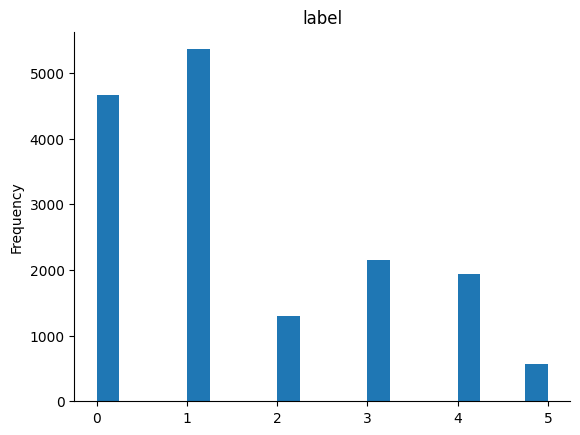

In [8]:
# @title label

from matplotlib import pyplot as plt
df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
# 6 different classes
classes = emotion['train'].features['label'].names
classes

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [10]:
# add labels_name
df['label_name'] = df['label'].apply(lambda x: classes[x])
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


### Dataset Analysis

Text(0.5, 1.0, 'Frequency of Classes')

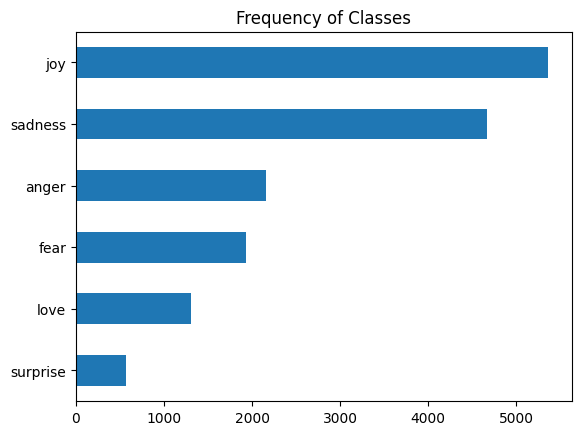

In [11]:
import matplotlib.pyplot as plt

label_counts = df['label_name'].value_counts(ascending=True)

label_counts.plot.barh()
plt.title('Frequency of Classes')

In [12]:
## Unbalanced Dataset
df['label_name'].value_counts(ascending=False)

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label_name, dtype: int64

<Axes: title={'center': 'Words Per Tweet'}, xlabel='label_name'>

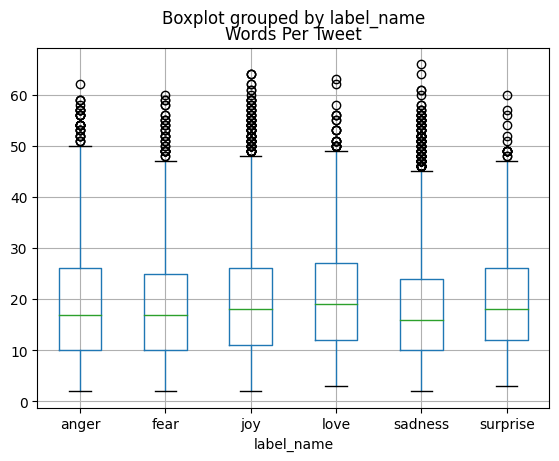

In [13]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.boxplot("Words Per Tweet", by='label_name')

## words --> token rough 1.5*words

### Text to Tokens Conversion for DistilBERT
- Transformer models like DistilBERT cannot receive raw strings as input; instead, they assume the text has been tokenized and encoded as numerical vectors.
- Tokenization is the step of breaking down a string into the atomic units used in the model

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/nlp1.
4.jpg" width=1000>

### Distillation
In the context of Deep Learning (DL), distillation refers to a process where a large, complex neural network (the teacher model) transfers its knowledge to a smaller, more efficient model (the student model). The goal is to distill the valuable information, generalizations, and patterns learned by the sophisticated teacher model into a compact student model, which typically has fewer parameters. This knowledge transfer is achieved by training the student model to mimic not only the final predictions of the teacher model but also the internal representations or knowledge embedded within the teacher's layers. Distillation is often used to create lightweight models suitable for deployment on resource-constrained devices without sacrificing performance.

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/distillation.png" width=1000>

#### DistilBERT

DistilBERT is a smaller, faster and cheaper version of BERT. It has 40% smaller than BERT and runs 60% faster while preserving over 95% of BERT’s performance.

**Introduction to DistilBERT:** DistilBERT, short for "Distill and BERT," is a compact version of the renowned BERT (Bidirectional Encoder Representations from Transformers) model.

**Model Architecture:** It reduces the number of layers and attention heads, resulting in a smaller and faster model.

**Parameter Reduction:** One of DistilBERT's key features is its parameter reduction strategy, achieved by distillation. This involves training the model on a combination of teacher (BERT) and student (DistilBERT).

**Efficiency and Speed:** By reducing the model's size and complexity, DistilBERT achieves a significant speedup during both training and inference.

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/nlp6.3.jpg" width=1000>

https://huggingface.co/distilbert-base-uncased

In [14]:
# The AutoTokenizer class is used for tokenizing input text data before feeding it into a transformer model.
# It automatically selects the appropriate tokenizer for a given pre-trained model, making it convenient
# for working with different models without needing to specify the tokenizer explicitly
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [15]:
text = "I love Machine Learning! Tokenization is awesome"
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 1045, 2293, 3698, 4083, 999, 19204, 3989, 2003, 12476, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [17]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'i', 'love', 'machine', 'learning', '!', 'token', '##ization', 'is', 'awesome', '[SEP]']


In [18]:
tokenizer.vocab_size, tokenizer.model_max_length

(30522, 512)

### Tokenization of the Emotion Dataset
- surprise
- love
- fear
- anger
- sadness
- joy



In [19]:
emotion.reset_format()

In [20]:
def tokenize(batch):
    temp =tokenizer(batch['text'], padding=True, truncation=True)
    return temp

In [21]:
#'input_ids', 'attention_mask'


#print(tokenize(emotion["train"][:1]))
print(tokenize(emotion["train"][:3]))
# print(tokenize(emotion["train"][:4]))
# print(tokenize(emotion["train"][:5]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [22]:
emotions_encoded = emotion.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [23]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

### Model Building

In [24]:
text

'I love Machine Learning! Tokenization is awesome'

In [26]:
inputs = tokenizer(text, return_tensors='pt')
inputs

{'input_ids': tensor([[  101,  1045,  2293,  3698,  4083,   999, 19204,  3989,  2003, 12476,
           102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [27]:
# AutoModel is a generic class that can automatically load
# any pre-trained model by specifying its name or path
from transformers import AutoModel
import torch

model_ckpt = "distilbert-base-uncased"
model = AutoModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [28]:
# For many transformer-based models, including BERT, GPT, etc., the last hidden state
# represents the contextualized embeddings of each token in the input sequence.
# These embeddings capture the contextual information of each token in the input text
# and can be useful for downstream tasks such as classification, named entity recognition
with torch.no_grad():
    outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

In [29]:
last_hidden_states.shape

torch.Size([1, 11, 768])

### Fine-Tuning Transformers

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/nlp1.
4.jpg" width=1000>


- `AutoModelForSequenceClassification` model has a classification head on top of the pretrained model outputs
- The first thing we need is a pretrained DistilBERT model like the one we used in the feature-based approach.
- The only slight modification is that we use the `AutoModelForSequenceClassification` model instead of AutoModel.
- The difference is that the `AutoModelForSequenceClassification` model has a classification head on top of the pretrained model outputs, which can be easily trained with the base model.

In [30]:
from transformers import AutoModelForSequenceClassification

num_labels = len(classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels = num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
device

device(type='cuda')

In [32]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [33]:
from transformers import TrainingArguments, Trainer

batch_size = 64
model_name = "distilbert-finetuned-emotion"

training_args = TrainingArguments(output_dir = model_name,
                                 num_train_epochs=2,
                                 learning_rate = 2e-5,
                                 per_device_train_batch_size= batch_size,
                                 per_device_eval_batch_size = batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy = 'epoch',
                                  disable_tqdm=False,
                                  )

trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded['train'],
                  eval_dataset=emotions_encoded['validation'],
                  tokenizer=tokenizer,
                  )

- **TrainingArguments:** This object specifies various training arguments such as the output directory where the trained model will be saved, the number of training epochs (num_train_epochs), the learning rate (learning_rate), batch sizes for training and evaluation (per_device_train_batch_size, per_device_eval_batch_size), weight decay, evaluation strategy, etc.

- **Trainer:** This object is responsible for managing the training process. It takes several arguments including:

- **model:** The model to be trained.
args: The training arguments specified earlier.
compute_metrics: A function to compute evaluation metrics.
train_dataset: The training dataset.
eval_dataset: The evaluation dataset.
tokenizer: The tokenizer associated with the model.
This setup indicates that you're fine-tuning a pre-trained model (model) on a specific task using a training dataset (emotions_encoded['train']) and evaluating it using a validation dataset (emotions_encoded['validation']). The training will run for two epochs (num_train_epochs=2) with a learning rate of 2e-5, and it will use a batch size of 64 for both training and evaluation. The trained model will be saved in the directory specified by output_dir

In [34]:
# Takes 4 min
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.302177,0.908500,0.908133
2,0.525600,0.211094,0.927500,0.927644


TrainOutput(global_step=500, training_loss=0.5256187133789062, metrics={'train_runtime': 238.9262, 'train_samples_per_second': 133.933, 'train_steps_per_second': 2.093, 'total_flos': 720342861696000.0, 'train_loss': 0.5256187133789062, 'epoch': 2.0})

In [35]:
preds_outputs = trainer.predict(emotions_encoded['test'])
preds_outputs.metrics

{'test_loss': 0.2156638652086258,
 'test_accuracy': 0.92,
 'test_f1': 0.9194770537815187,
 'test_runtime': 3.7517,
 'test_samples_per_second': 533.092,
 'test_steps_per_second': 8.529}

In [36]:
from sklearn.metrics import classification_report

y_preds = np.argmax(preds_outputs.predictions, axis=1)
y_true = emotions_encoded['test'][:]['label']

print(classes)
print(classification_report(y_true, y_preds))

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       581
           1       0.93      0.94      0.94       695
           2       0.79      0.80      0.80       159
           3       0.91      0.93      0.92       275
           4       0.90      0.89      0.89       224
           5       0.82      0.68      0.74        66

    accuracy                           0.92      2000
   macro avg       0.89      0.87      0.88      2000
weighted avg       0.92      0.92      0.92      2000



In [37]:
label_counts

surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: label_name, dtype: int64

In [38]:
text = 'i want to kill you'
input_encoded = tokenizer(text, return_tensors='pt').to(device)
with torch.no_grad():
    outputs = model(**input_encoded)

logits = outputs.logits
pred = torch.argmax(logits, dim=1).item()
pred, classes[pred]

(3, 'anger')

In [39]:
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.4463, -0.0182, -0.6899,  1.6446, -0.2414, -1.7389]],
       device='cuda:0'), hidden_states=None, attentions=None)

In [40]:
test = pd.DataFrame({'text': ['i want to kill you', 'please be happy', 'something else']})
test
#model = your_model  # Replace with your actual model
#tokenizer = your_tokenizer  # Replace with your actual tokenizer
#device = 'cuda' if torch.cuda.is_available() else 'cpu'
#classes = ['class1', 'class2', 'class3']  # Replace with your actual class labels


,text
0,i want to kill you
1,please be happy
2,something else


In [41]:
# Define the inference function
def inference(text, model, tokenizer, device, classes):
    input_encoded = tokenizer(text, return_tensors='pt').to(device)
    with torch.no_grad():
        outputs = model(**input_encoded)
    logits = outputs.logits
    pred = torch.argmax(logits, dim=1).item()
    return classes[pred]

#Inference
test['prediction'] = test['text'].apply(lambda x: inference(x, model, tokenizer, device, classes))
test

,text,prediction
0,i want to kill you,anger
1,please be happy,joy
2,something else,joy


In [42]:
!mkdir newmodel

### Save Model

In [43]:
model_path = "/content/newmodel"

# Save the trained model and tokenizer
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('/content/newmodel/tokenizer_config.json',
 '/content/newmodel/special_tokens_map.json',
 '/content/newmodel/vocab.txt',
 '/content/newmodel/added_tokens.json',
 '/content/newmodel/tokenizer.json')

### Load model

In [44]:
from transformers import DistilBertForSequenceClassification
import torch

## check GPU devide
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the model and tokenizer for inference
loaded_model = DistilBertForSequenceClassification.from_pretrained(model_path)
loaded_model = loaded_model.to(device)
loaded_tokenizer = tokenizer.from_pretrained(model_path)

In [45]:
# Define the inference function
def inference(text, model, tokenizer, device, classes):
    input_encoded = tokenizer(text, return_tensors='pt').to(device)
    with torch.no_grad():
        outputs = model(**input_encoded)
    logits = outputs.logits
    pred = torch.argmax(logits, dim=1).item()
    return classes[pred]

In [46]:
# New Inference!
test['predictionModelLoad'] = test['text'].apply(lambda x: inference(x, loaded_model, loaded_tokenizer, device, classes))
test

,text,prediction,predictionModelLoad
0,i want to kill you,anger,anger
1,please be happy,joy,joy
2,something else,joy,joy


In [47]:
# zip the folder
!zip -r distilbert_emopred.zip "/content/newmodel"

  adding: content/newmodel/ (stored 0%)
  adding: content/newmodel/tokenizer_config.json (deflated 76%)
  adding: content/newmodel/tokenizer.json (deflated 71%)
  adding: content/newmodel/vocab.txt (deflated 53%)
  adding: content/newmodel/model.safetensors (deflated 8%)
  adding: content/newmodel/special_tokens_map.json (deflated 42%)
  adding: content/newmodel/config.json (deflated 52%)
